In [423]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()


In [424]:
file_path = 'bank-additional-full.csv'
df = pd.read_csv(file_path,sep=";")
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [426]:
print(df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

## **1. Analyzing the data Set**

In [427]:
# cheak null value
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

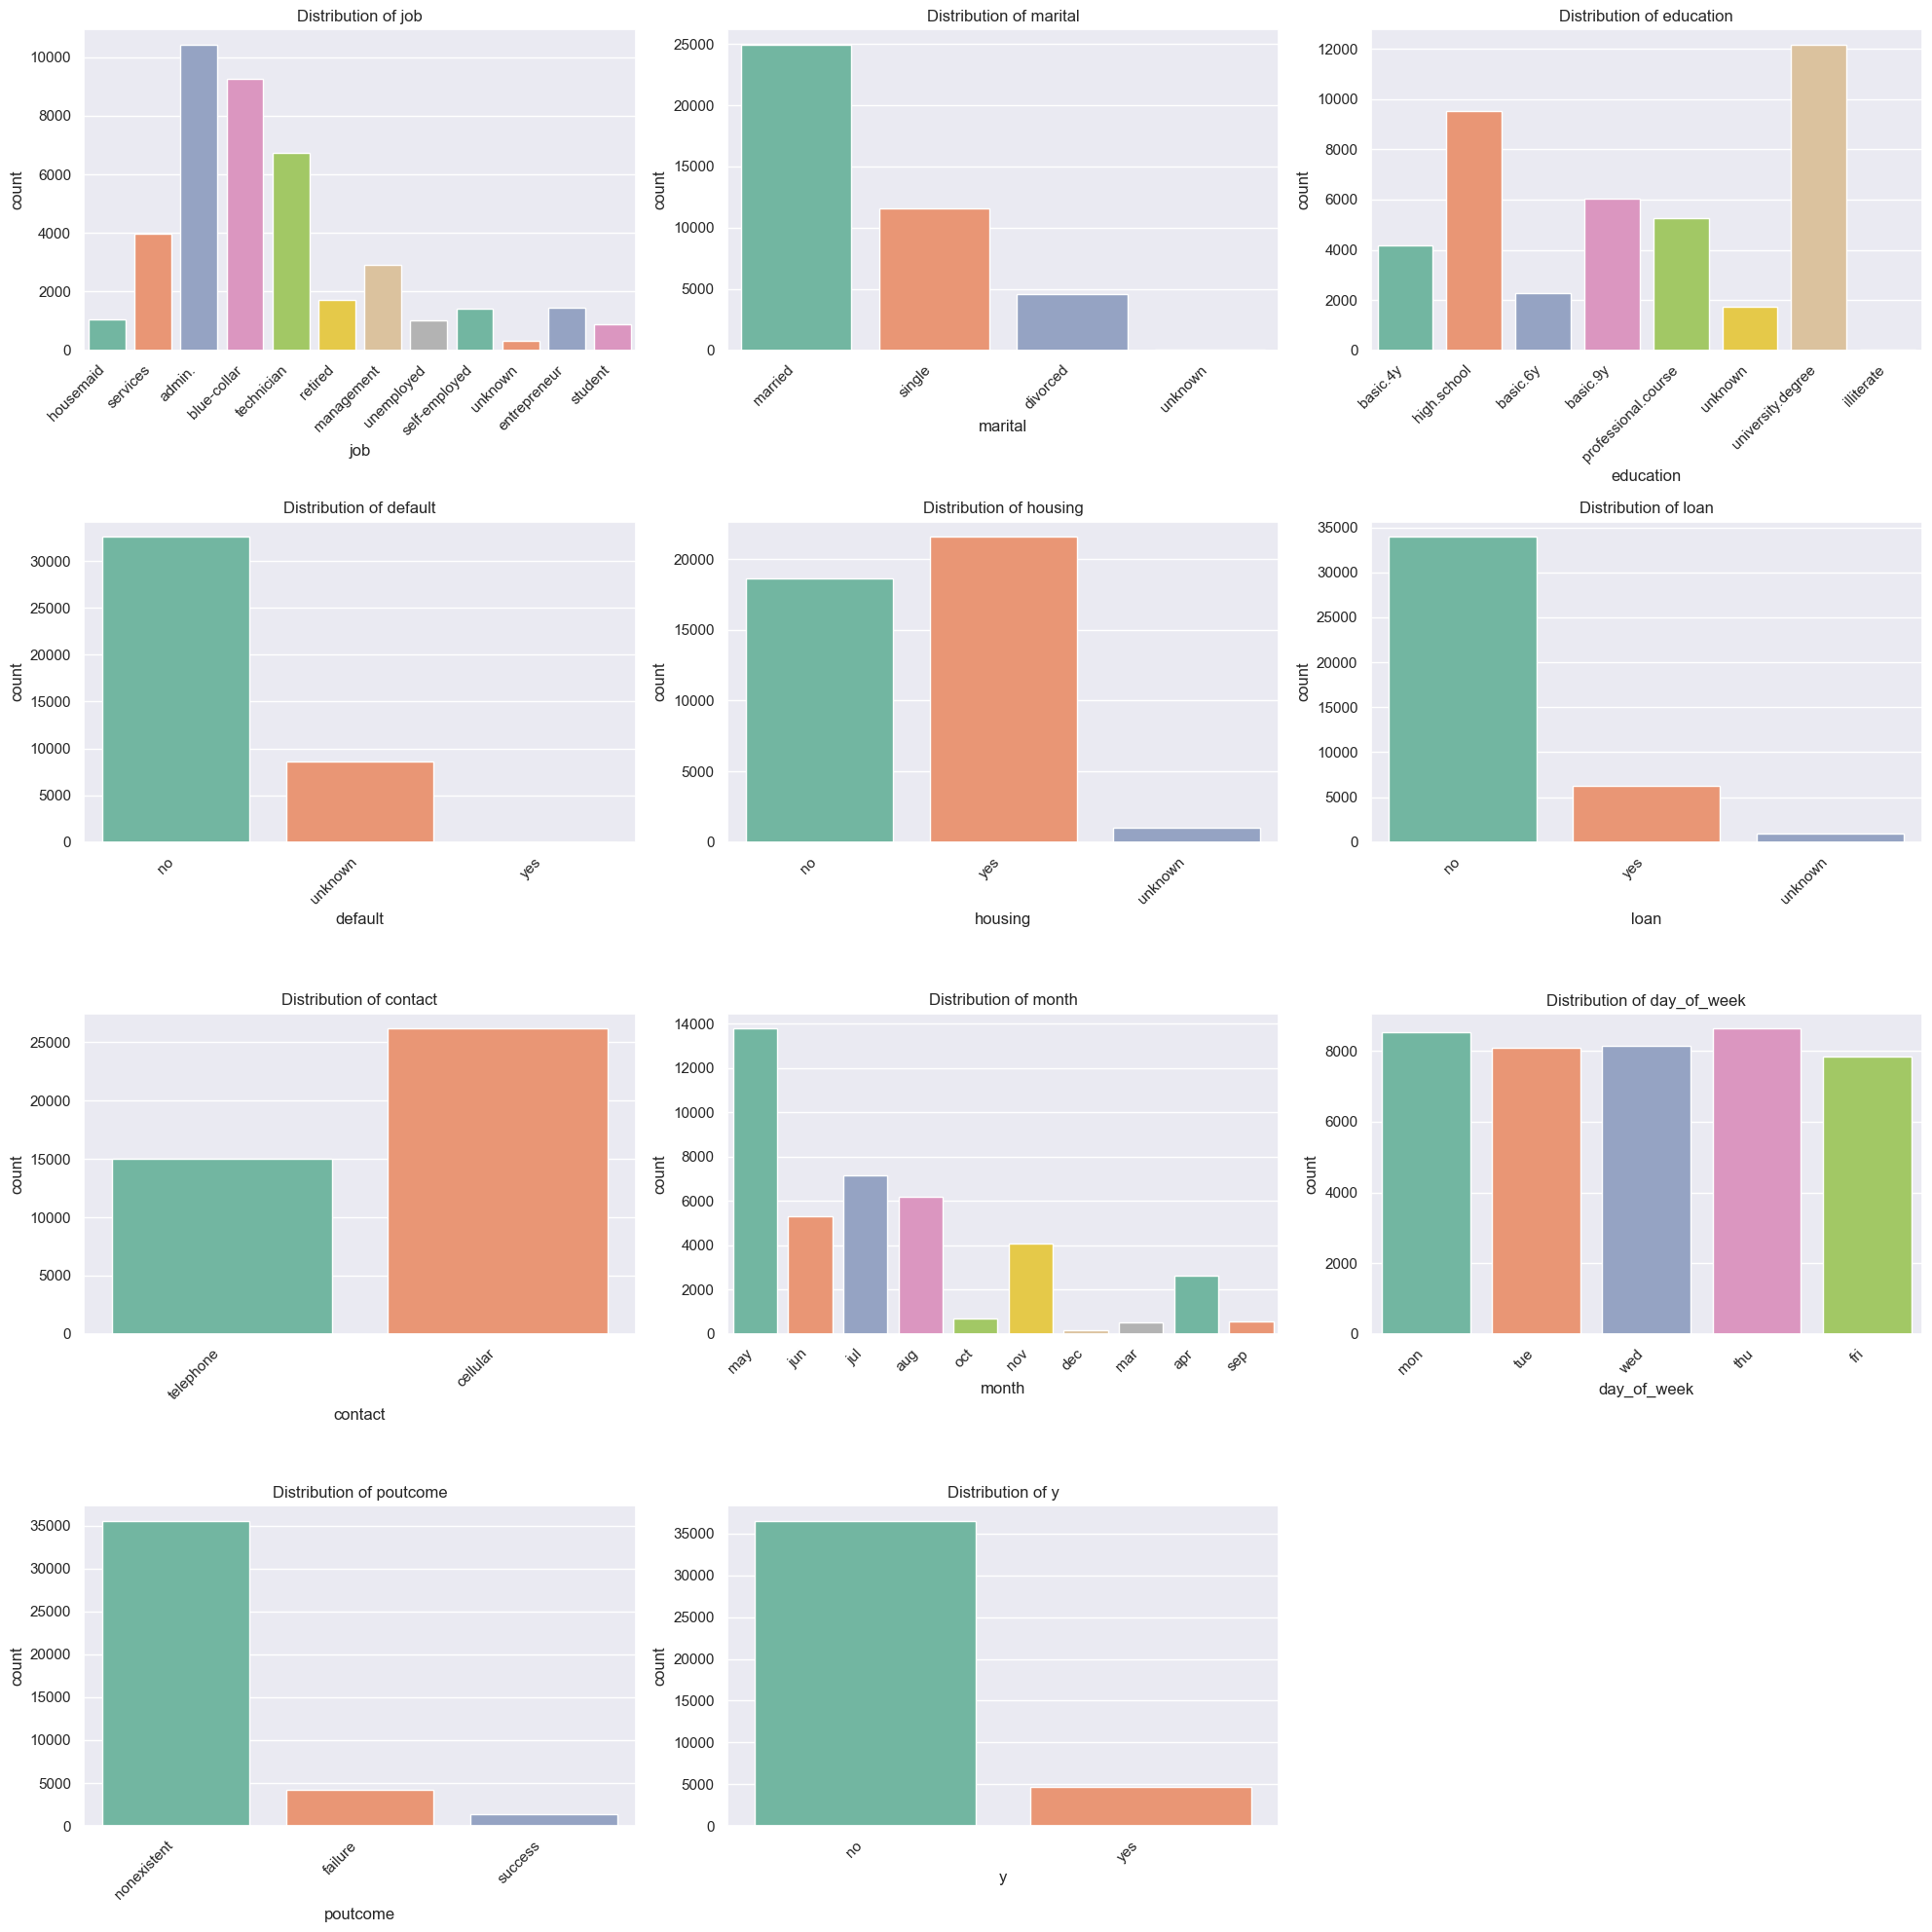

In [428]:
categorical_columns = df.select_dtypes(include="object").columns


#categorical features visual
n_cols = 3  
n_rows = (len(categorical_columns) // n_cols) + 1  


plt.figure(figsize=(20, 5 * n_rows))
plt_number = 1

for column in categorical_columns:
    
    ax = plt.subplot(n_rows, n_cols, plt_number)
    
    sns.countplot(x=column, data=df, hue=column, palette='Set2', legend=False)  # Assign column to hue
    

    plt.xlabel(column)  
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')  
    plt_number += 1

plt.tight_layout()

plt.show()


**Findings**
 - we can find the categories of the categorical fetures and the count of it using this
 - data we can understand the type of clients and the backround of them 
 - outcome of the previous marketing campaign
 - number the client subscribed a term deposit



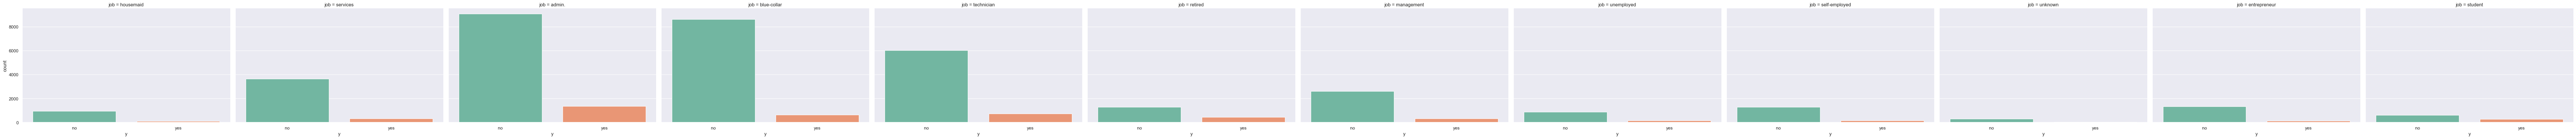

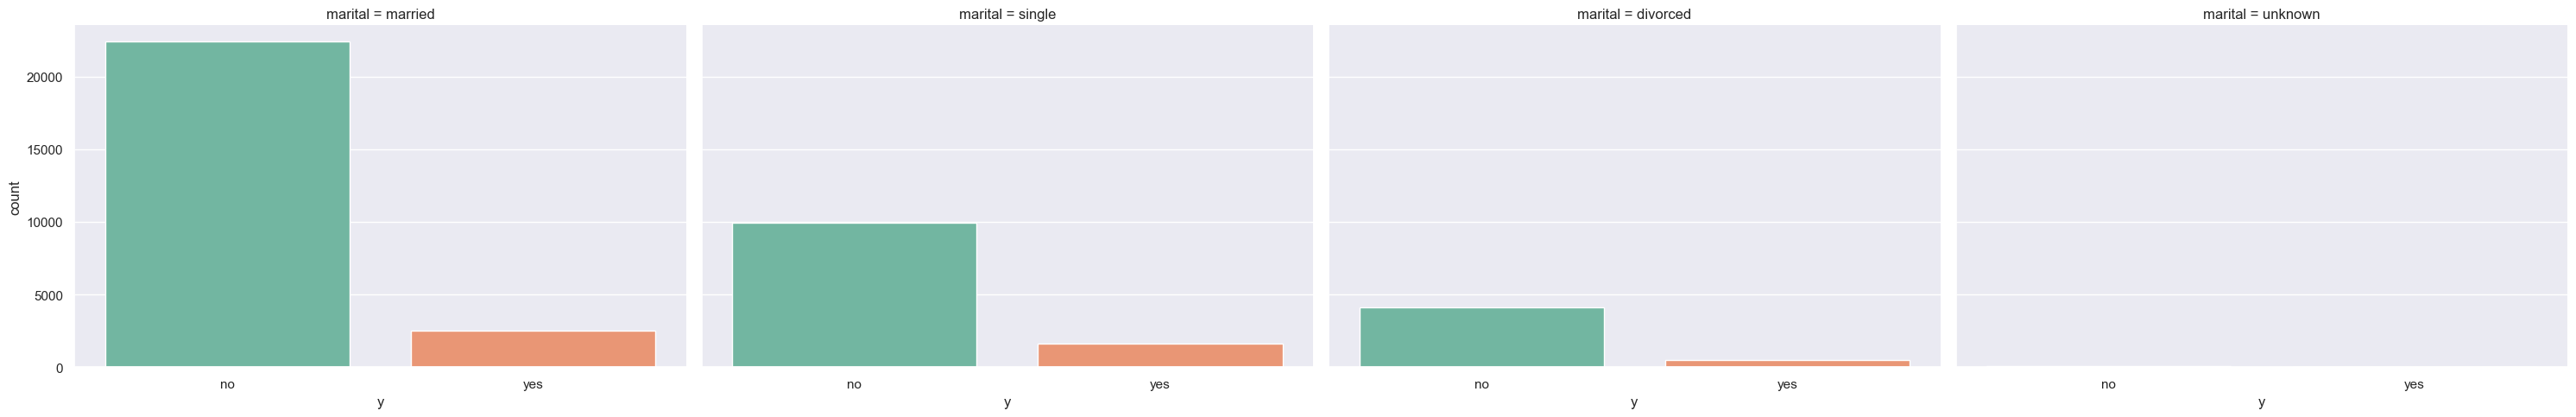

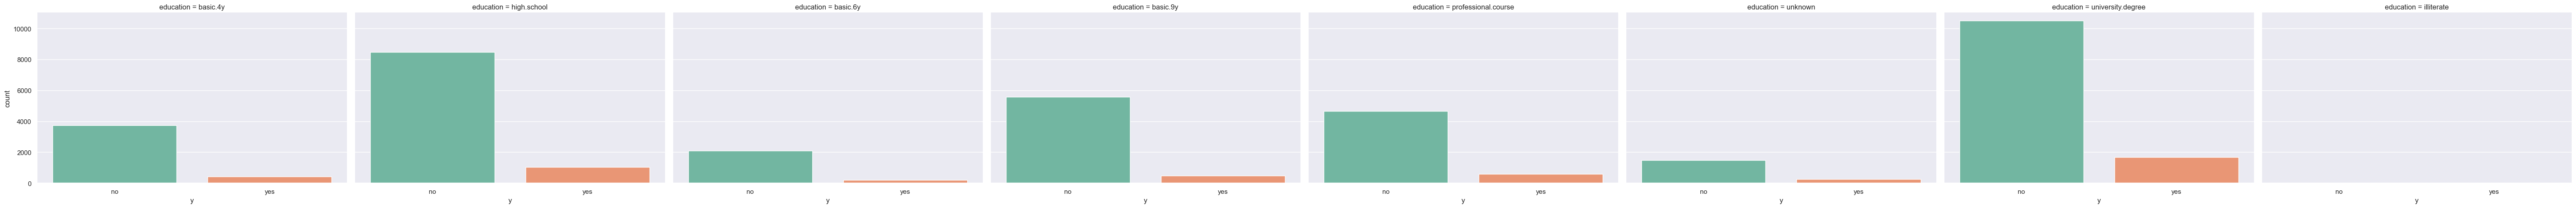

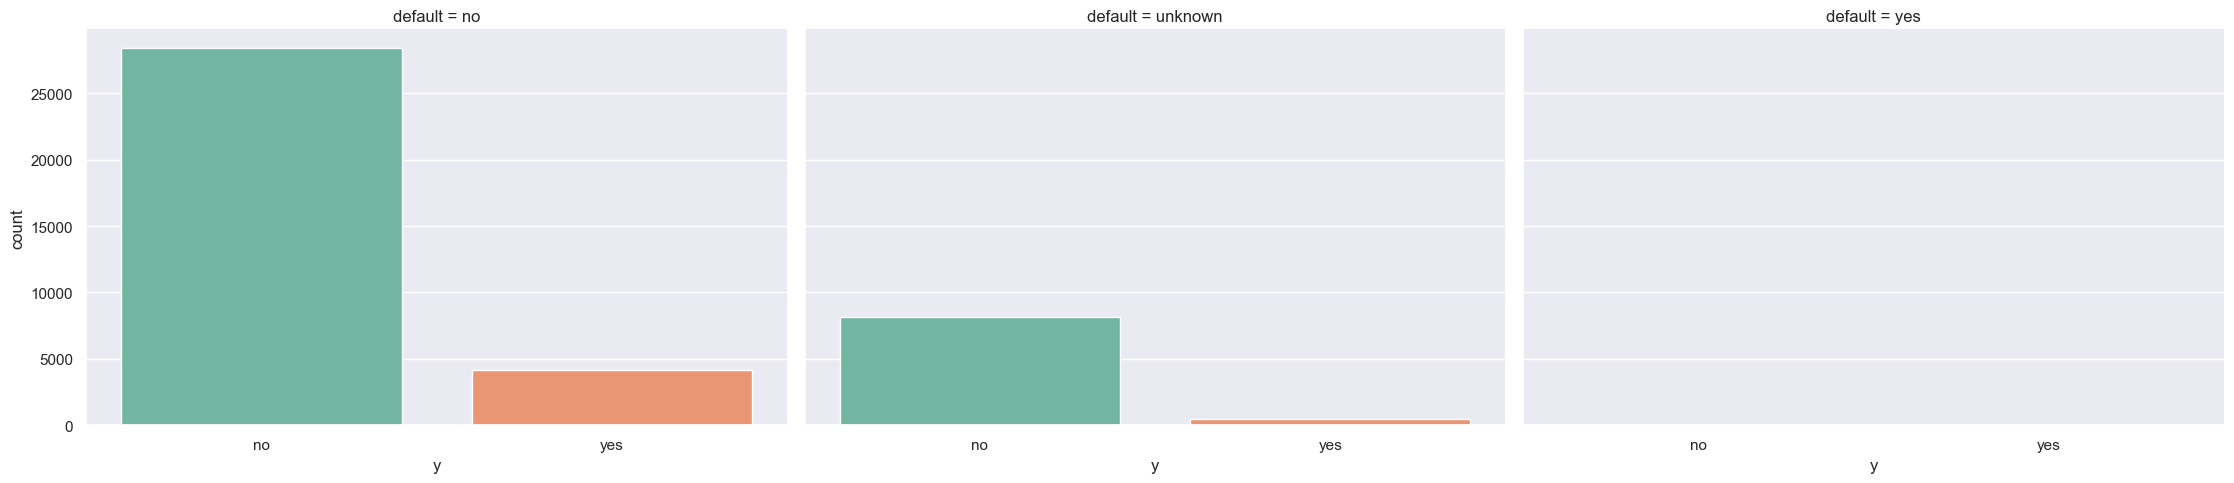

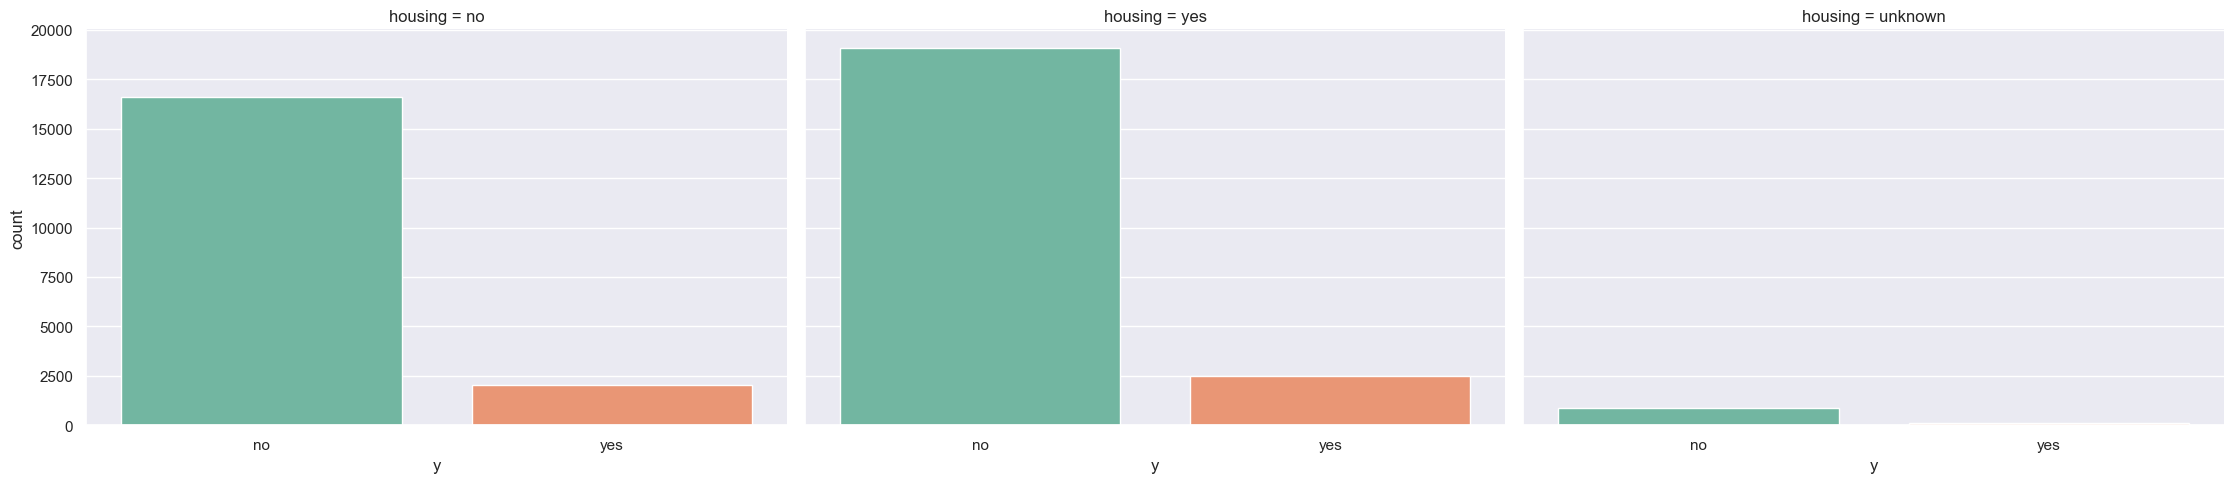

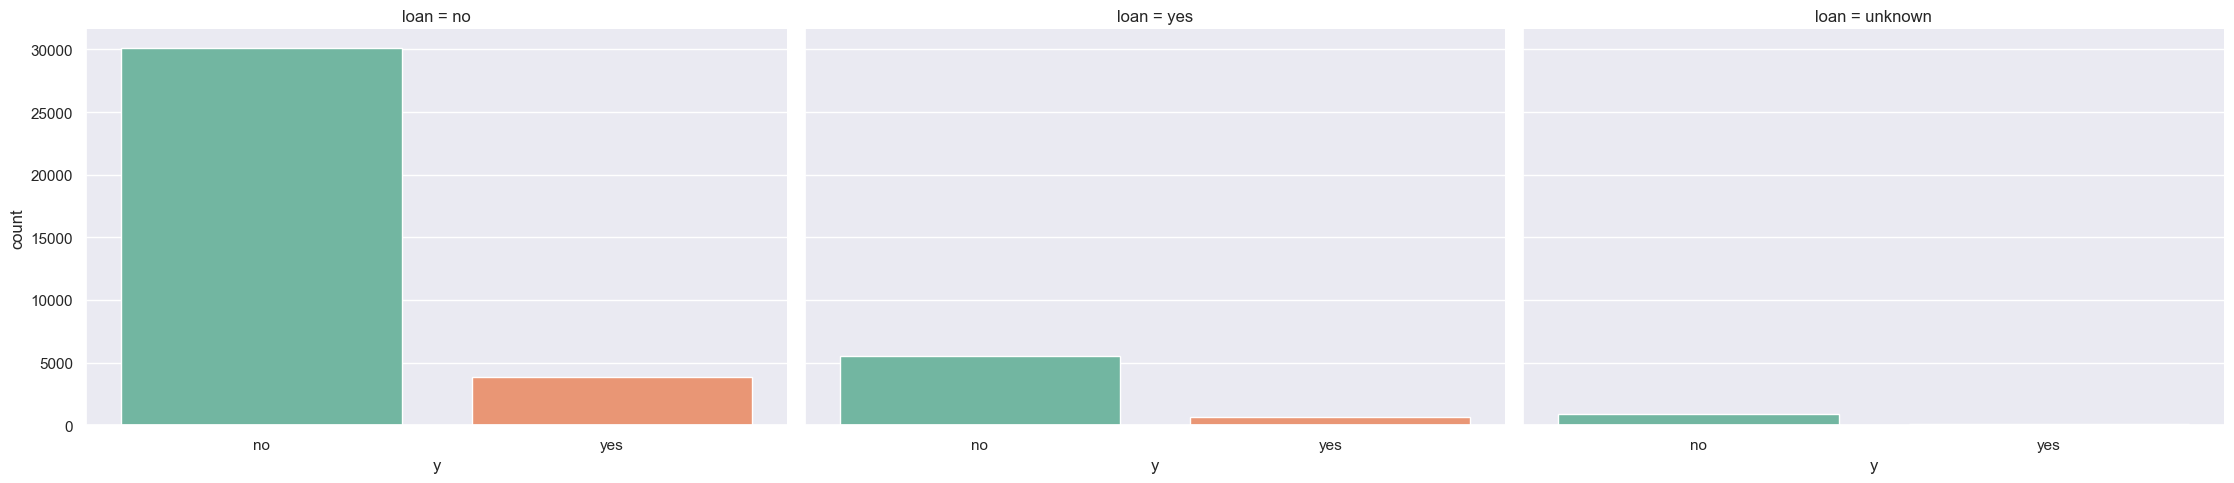

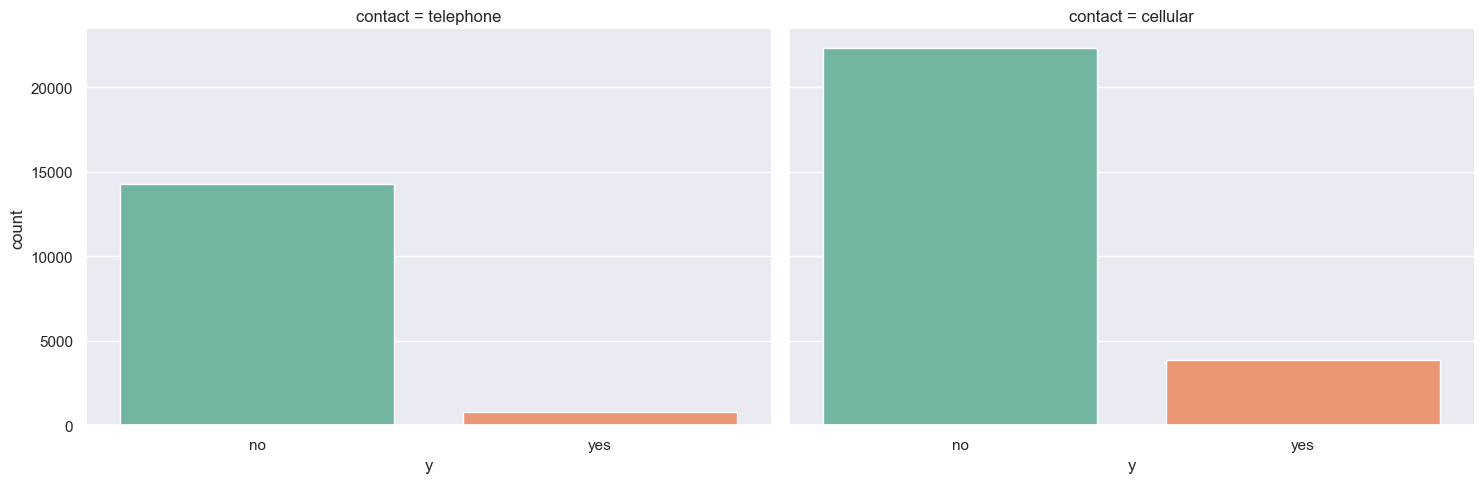

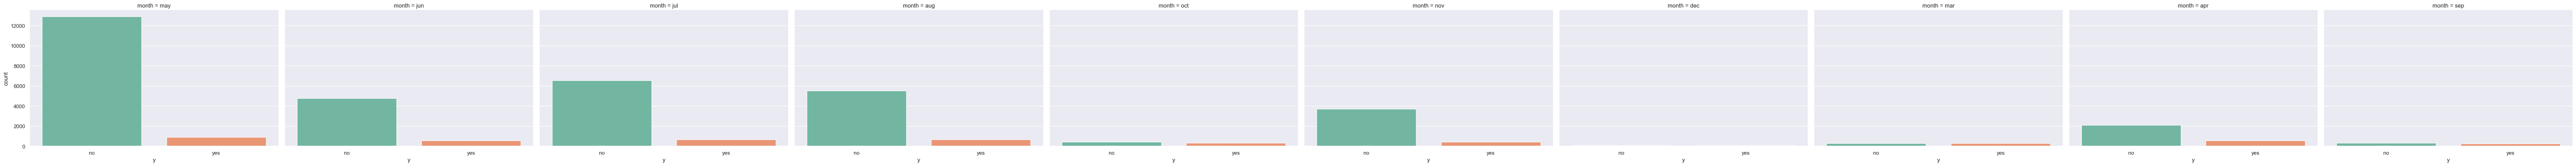

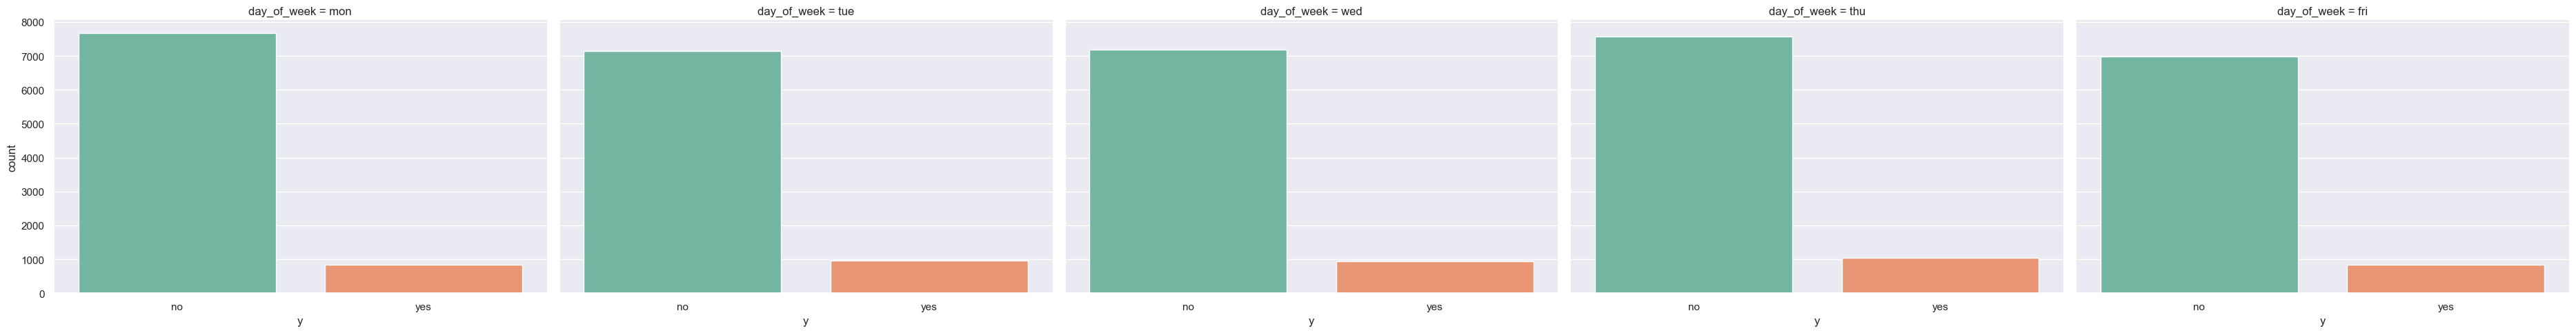

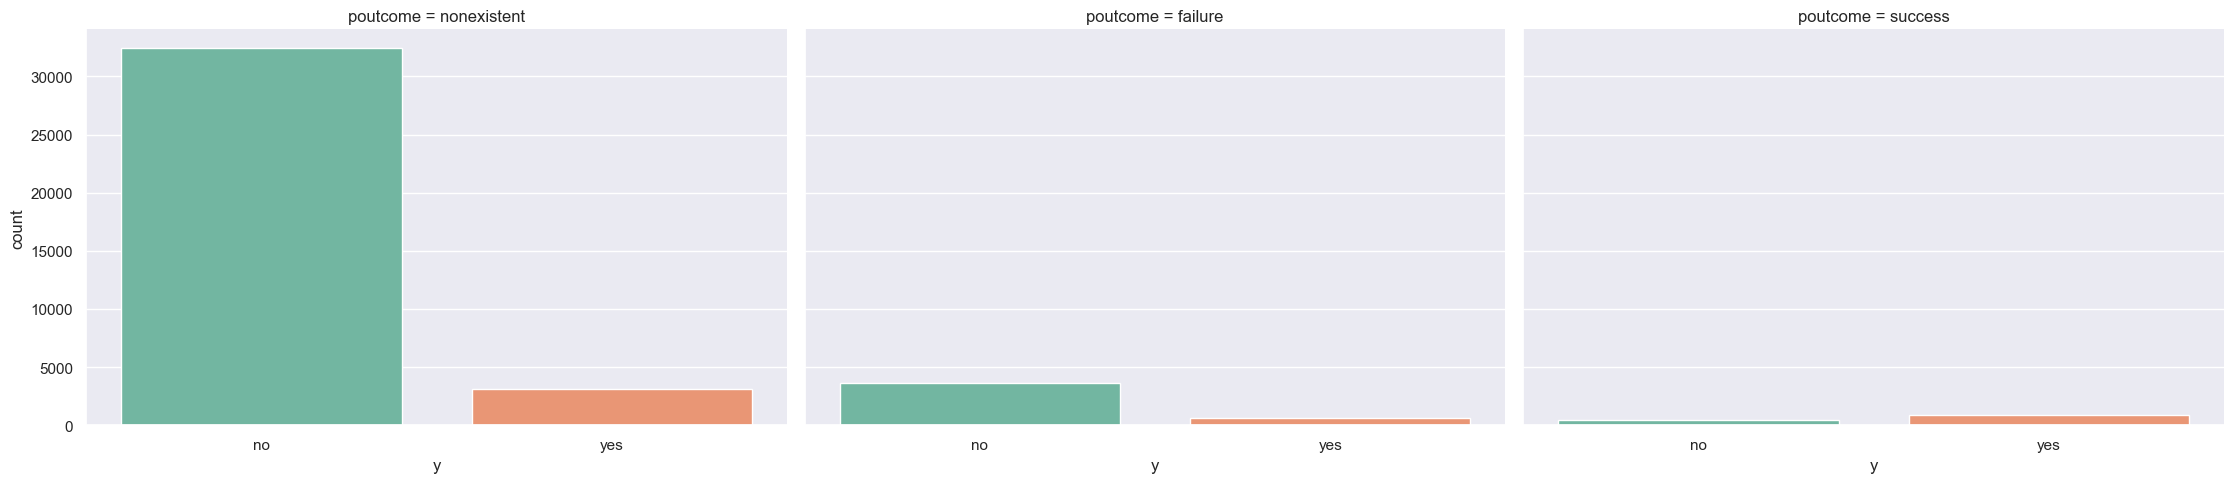

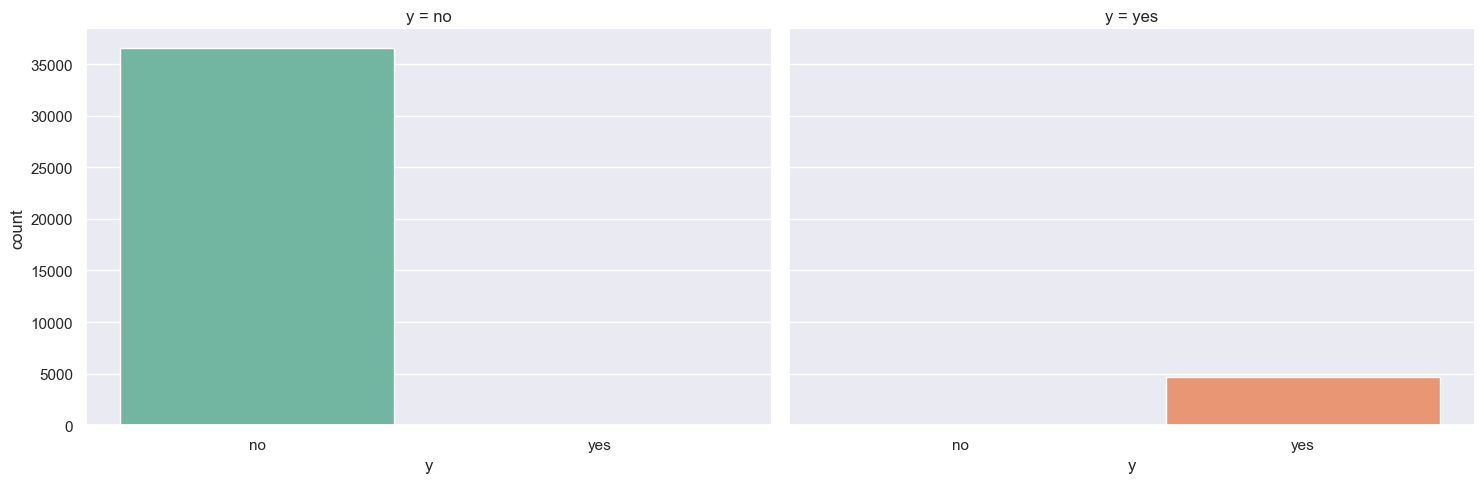

In [429]:
# categorical features and the target
for col in categorical_columns:
    # Create a count plot for the target variable 'y' across each categorical column
    sns.catplot(x="y", hue="y", col=col, kind="count", data=df, height=5, aspect=1.5, palette='Set2', legend=False)

# Show the plots
plt.show()

**Findings**
- according to the client type how many of them subscribe this
- outcome of the pre campaign
- the month clients show there highest interest in deposit

In [430]:
numerical_columns = df.select_dtypes(include=['number']).columns  # Identify categorical columns
for column in numerical_columns:
    print(f"{column}")


age
duration
campaign
pdays
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed


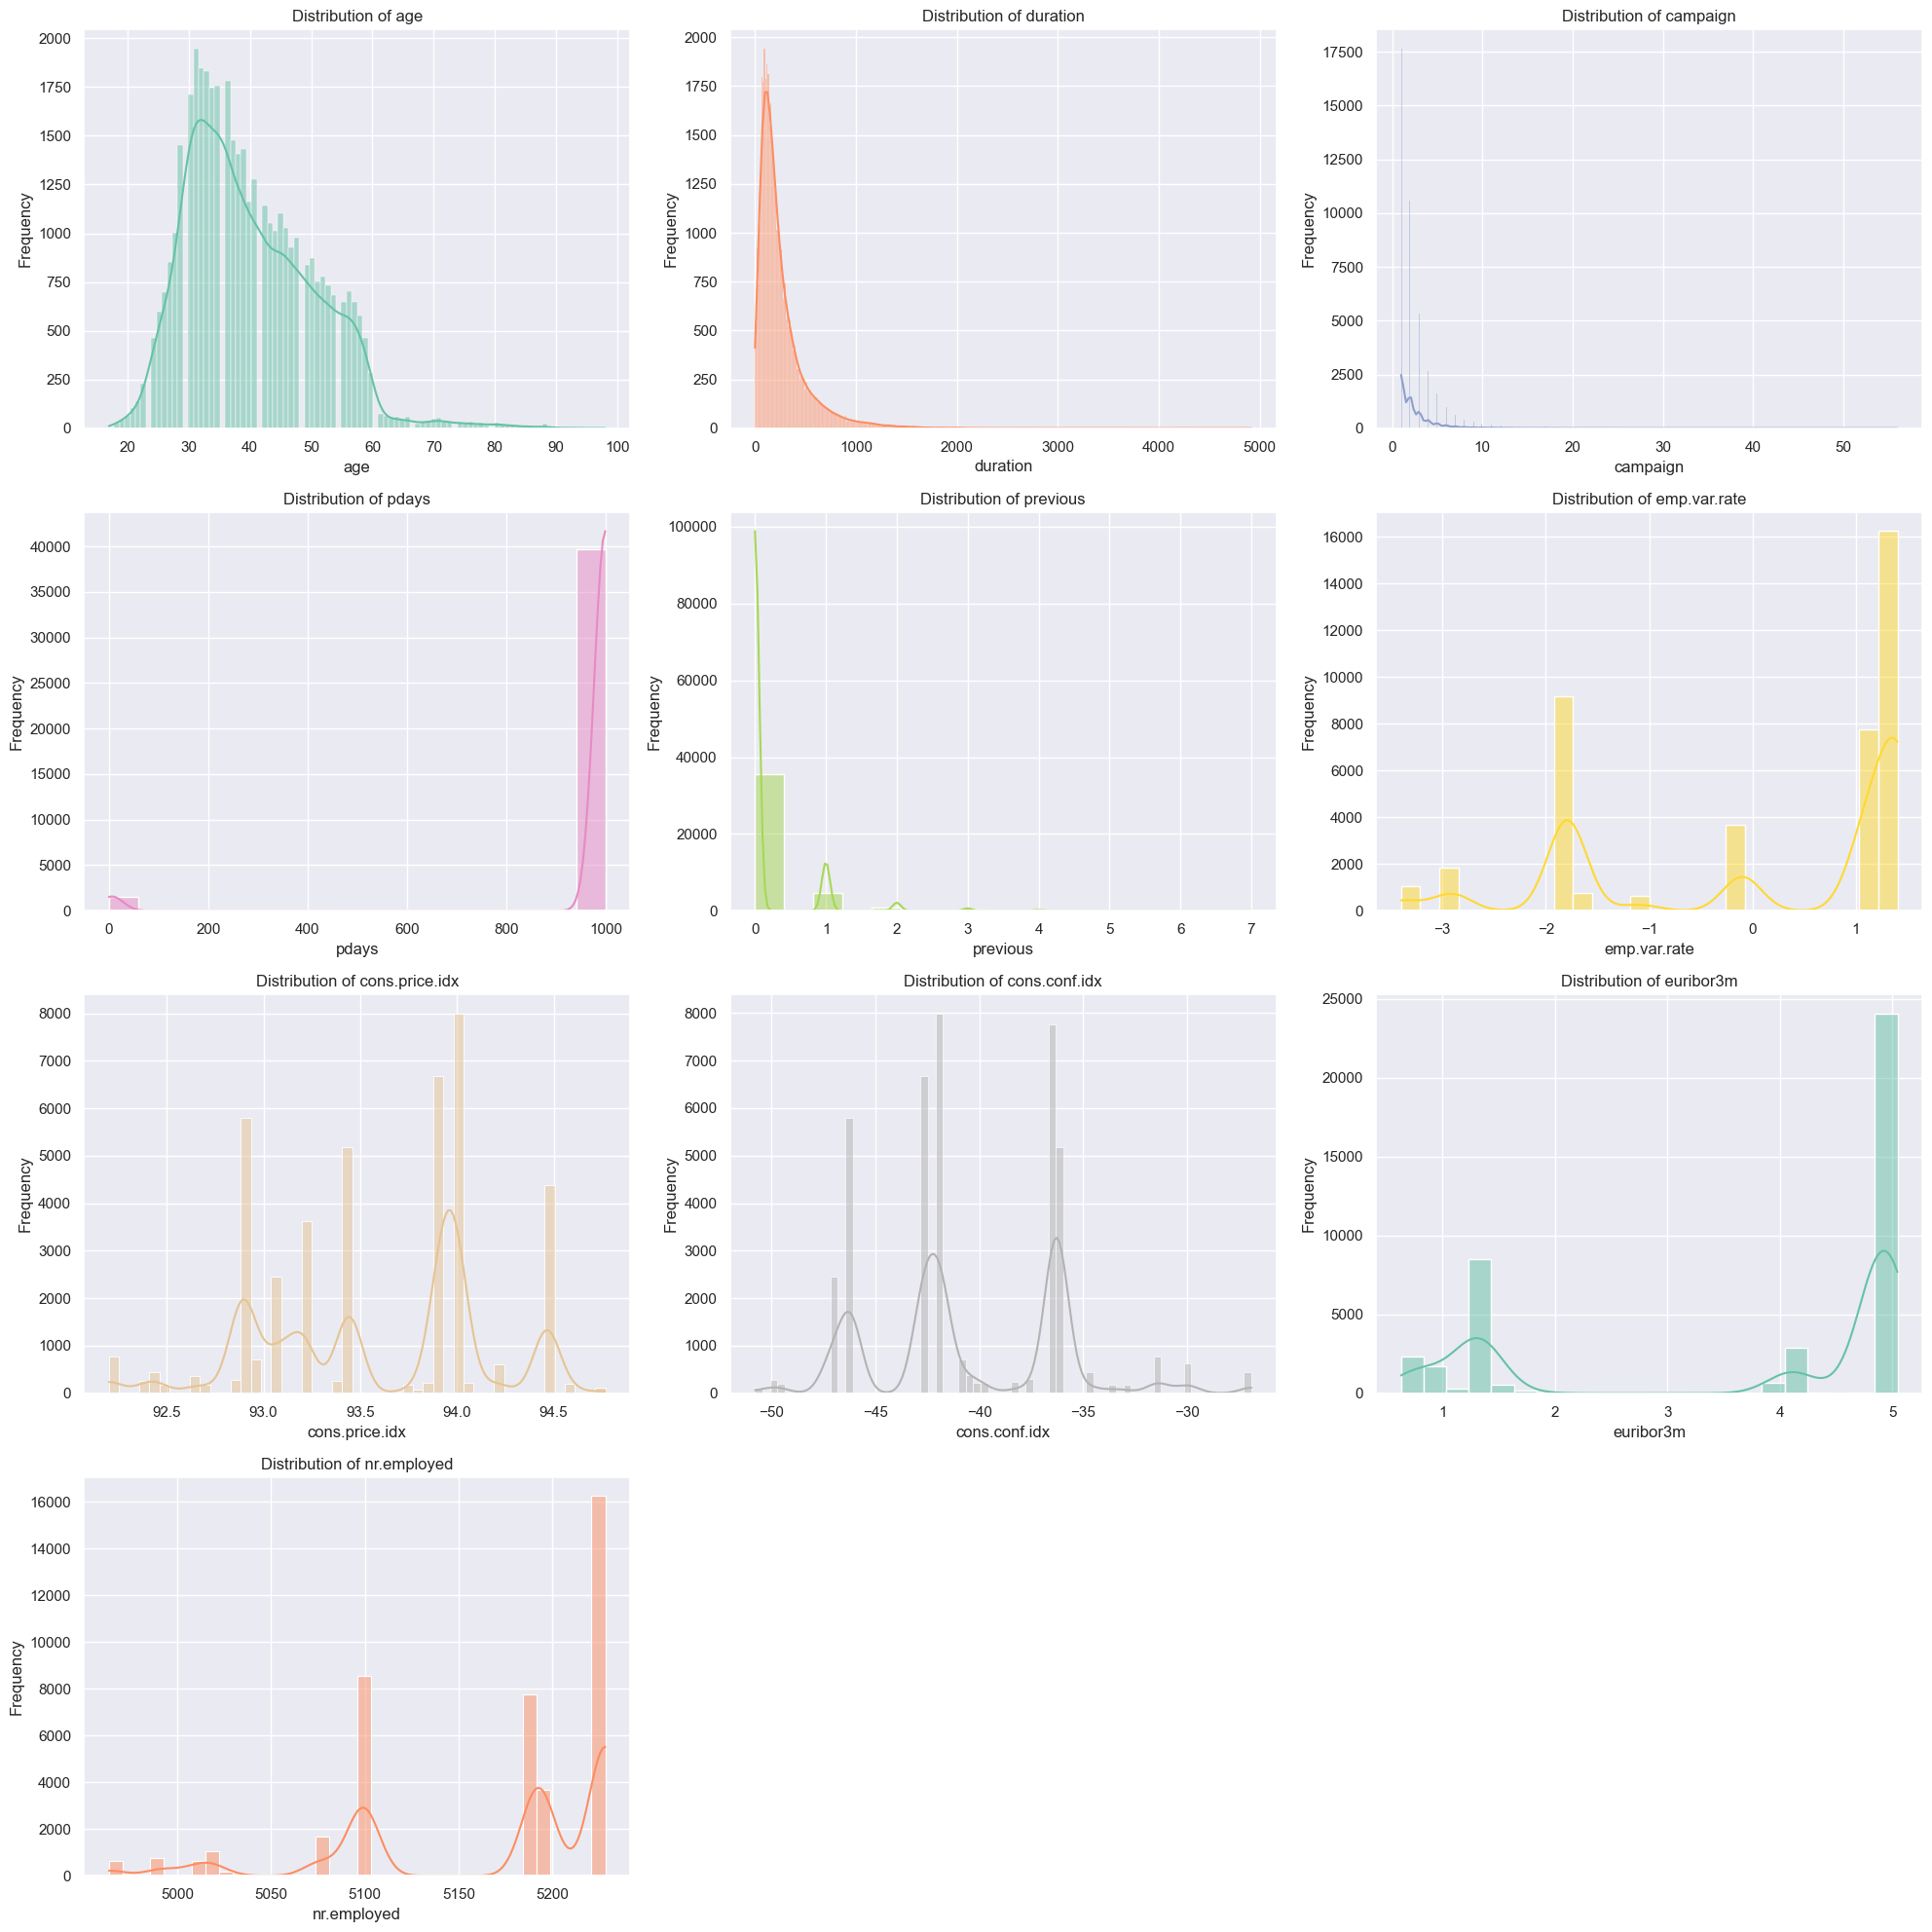

In [431]:

colors = sns.color_palette("Set2", n_colors=len(numerical_columns))

# Set up the figure with enough space for all plots
n_cols = 3  # You can change the number of columns as needed
n_rows = (len(numerical_columns) // n_cols) + 1  # Calculate number of rows

plt.figure(figsize=(20, 5 * n_rows))  # Adjust the figure size based on number of rows
plt_number = 1

# Loop through numerical columns and create histograms with KDE and different colors
for idx, col in enumerate(numerical_columns):
    ax = plt.subplot(n_rows, n_cols, plt_number)
    sns.histplot(df[col], kde=True, color=colors[idx])  # Use a different color for each plot
    plt.xlabel(col)  
    plt.ylabel('Frequency')  
    plt.title(f'Distribution of {col}') 
    plt_number += 1

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

**Findings**
-  which range of the clients doing the deposits  in there features like age, balance and etc

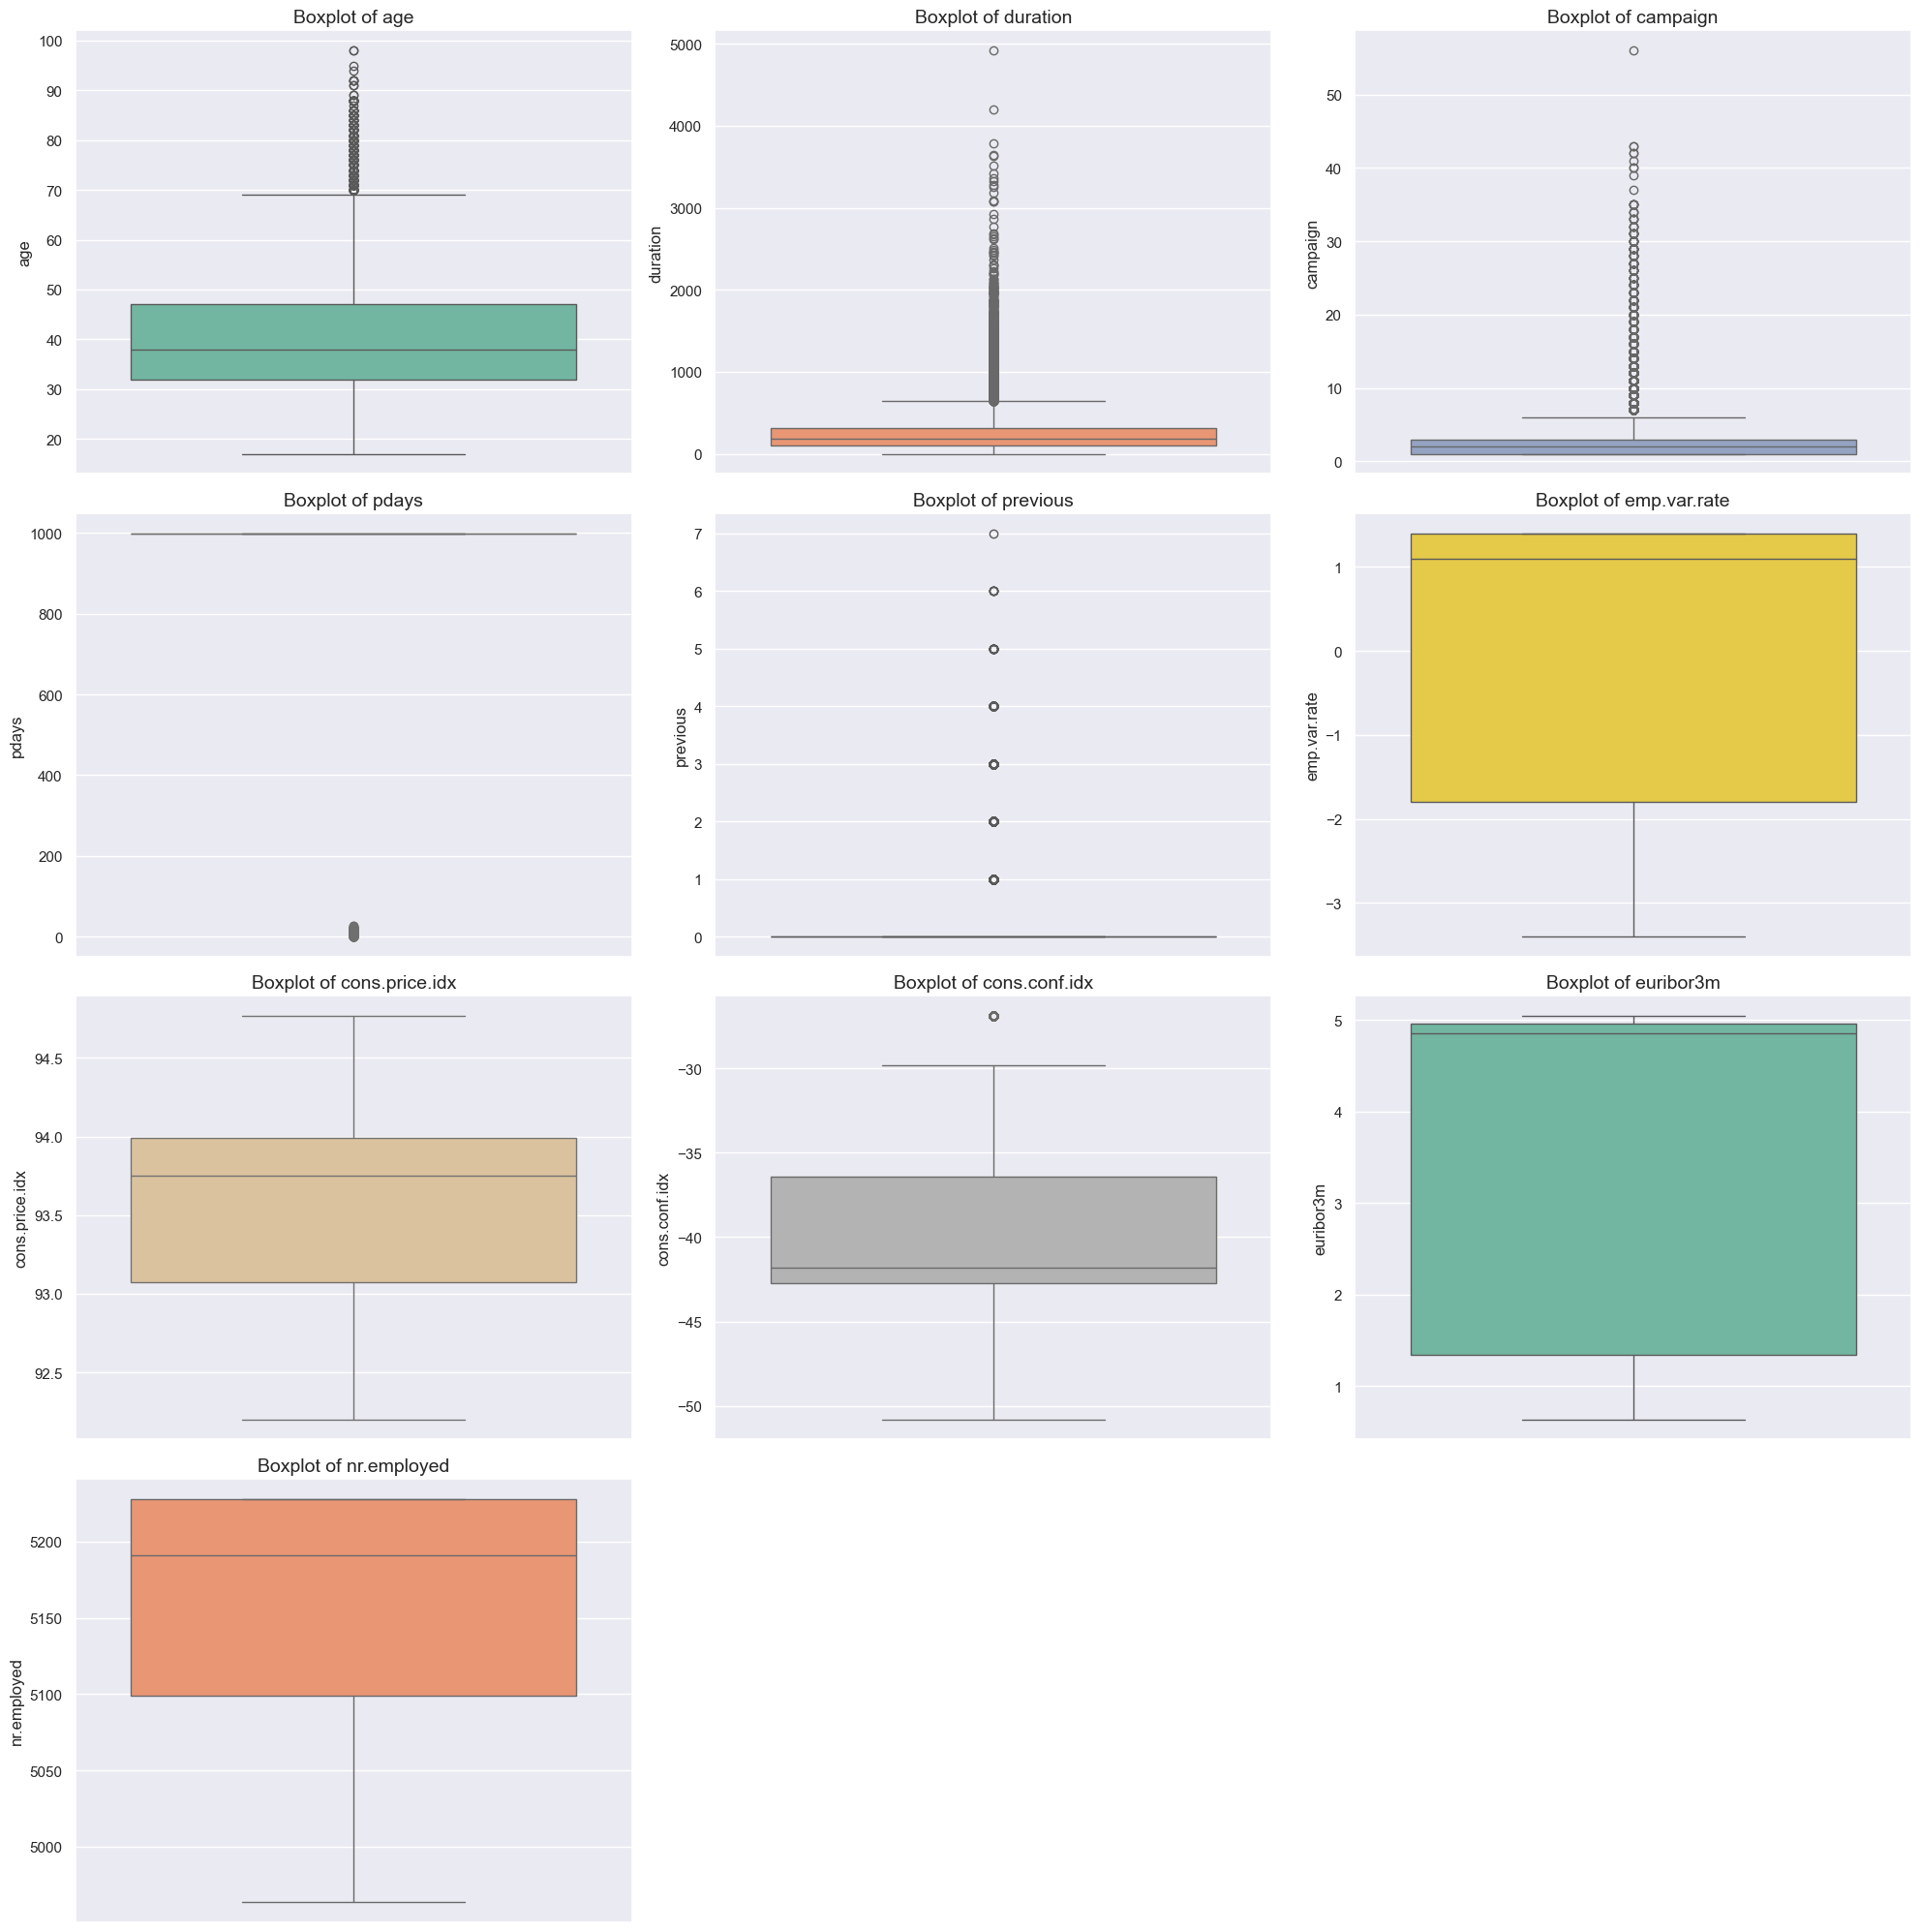

In [432]:
# Define a list of colors for different boxplots
colors = sns.color_palette("Set2", len(numerical_columns))

# Adjust figure size to accommodate many plots
plt.figure(figsize=(20, 60))

# Counter for subplot position
plt_number = 1

# Loop through each numerical column to create box plots
for idx, col in enumerate(numerical_columns):
    # Create subplot
    ax = plt.subplot(12, 3, plt_number)
    
    # Create boxplot for the numerical feature with a unique color
    sns.boxplot(y=df[col], color=colors[idx])
    
    # Add labels and title
    plt.ylabel(col, fontsize=12)
    plt.title(f'Boxplot of {col}', fontsize=14)
    
    # Increment subplot counter
    plt_number += 1

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()



**Findings**
- age , duration, campaign, pdays and  previous has some outliers
- in the box plot of pdays most of the numvbers near to the 999 (witch mean NAN)
- in previous most of the numbers are 0 and the outliers are the only thing that have some other numbers


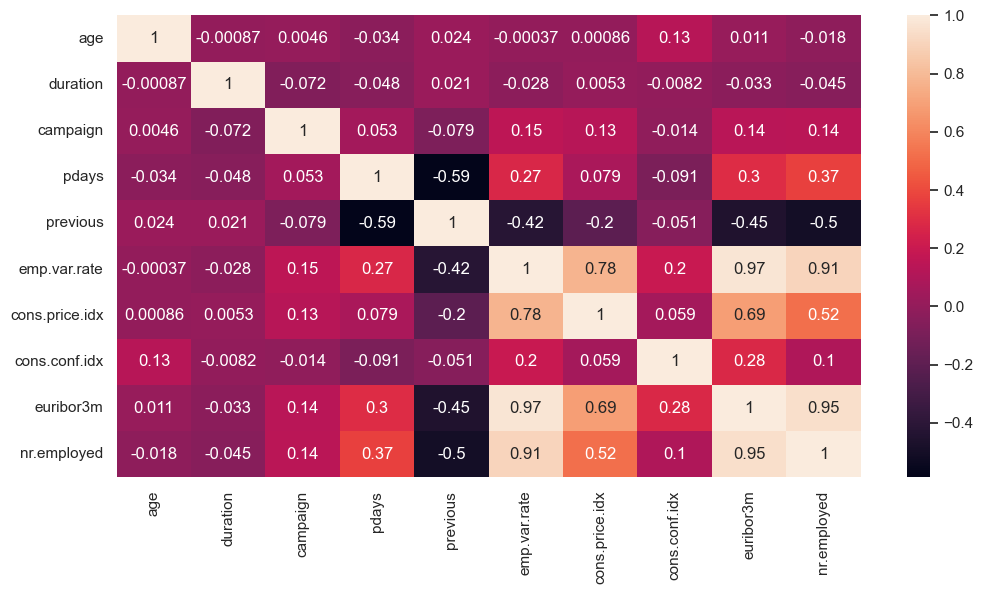

In [433]:
# Correlation between numerical fetures
cor = df.select_dtypes(include=['number']).corr()
fig = plt.figure(figsize=(12,6))
sns.heatmap(cor, annot= True)

plt.show()


**Findings**
- euribor3m, employed, emp.var.rate are have correlation over 0.95

## **2. Feature Engneering**

In [434]:
df2 = df.copy()
print(df2.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [435]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2.1 Removing unwanted colums and outliers

In [436]:
df2.drop('duration', axis=1, inplace=True)

In [437]:
df2.groupby(['y','default']).size()

y    default
no   no         28391
     unknown     8154
     yes            3
yes  no          4197
     unknown      443
dtype: int64

In [438]:
df2.drop('default', axis=1, inplace=True)

In [439]:
df2.groupby(['y','pdays']).size()


y    pdays
no   0            5
     1           18
     2           24
     3          141
     4           55
     5           17
     6          123
     7           20
     8            6
     9           29
     10          22
     11          13
     12          32
     13           8
     14           9
     15           8
     16           5
     17           6
     18           3
     19           2
     20           1
     22           1
     999      36000
yes  0           10
     1            8
     2           37
     3          298
     4           63
     5           29
     6          289
     7           40
     8           12
     9           35
     10          30
     11          15
     12          26
     13          28
     14          11
     15          16
     16           6
     17           2
     18           4
     19           1
     21           2
     22           2
     25           1
     26           1
     27           1
     999       3673
dtype: in

**Finding**
- in here  999 represent not contacted before and also previous they mentioned about how many time contacted so we need to drop

In [440]:
df2.drop('pdays', axis=1, inplace=True)

**Expalanation**
- last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [441]:
df2.groupby('age', sort= True)['age'].count()


age
17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Name: age, Length: 78, dtype: int64

**Finding**
- age is importand to predict the value
- 17 - 98 is more common age gap

In [442]:
df2.groupby(['y','campaign'], sort= True)['campaign'].count()

y    campaign
no   1           15342
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
     33              4
     34              3
     35              5
     37              1
     39              1
     40              2
     41              1
     42              2
     43              2
     56              1
yes  1            23

**Findings**
- in some distribtion are much skewed on left side so thy seems to have outliers

In [443]:
df2.groupby(['y','previous'], sort= True)['campaign'].count()

y    previous
no   0           32422
     1            3594
     2             404
     3              88
     4              32
     5               5
     6               2
     7               1
yes  0            3141
     1             967
     2             350
     3             128
     4              38
     5              13
     6               3
Name: campaign, dtype: int64

### 2.2 Encoding dataset

In [444]:
df2['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [445]:
df_encoded = pd.get_dummies(df2, columns=['job', 'marital', 'contact', 'month', 'poutcome','day_of_week'])



In [446]:
education_mapping = {
    'illiterate': 1,
    'unknown': 2,
    'basic.4y': 3,
    'basic.6y': 4,
    'basic.9y': 5,
    'high.school': 6,
    'professional.course': 7,
    'university.degree': 8
}

# Apply the mapping to the 'education' column
df_encoded['education'] = df2['education'].map(education_mapping)


In [447]:
from sklearn.preprocessing import StandardScaler

binary_col = ['housing','loan','y']
for col in binary_col:
    df_encoded[col] = df_encoded[col].apply(lambda x : True if x == 'yes' else False)


    

In [448]:
print(df_encoded.head())

   age  education  housing   loan  campaign  previous  emp.var.rate  \
0   56          3    False  False         1         0           1.1   
1   57          6    False  False         1         0           1.1   
2   37          6     True  False         1         0           1.1   
3   40          4    False  False         1         0           1.1   
4   56          6    False   True         1         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  ...  month_oct  month_sep  \
0          93.994          -36.4      4.857  ...      False      False   
1          93.994          -36.4      4.857  ...      False      False   
2          93.994          -36.4      4.857  ...      False      False   
3          93.994          -36.4      4.857  ...      False      False   
4          93.994          -36.4      4.857  ...      False      False   

   poutcome_failure  poutcome_nonexistent  poutcome_success  day_of_week_fri  \
0             False                  True       

In [449]:
print(df_encoded[['emp.var.rate', 'euribor3m', 'nr.employed', 'y']].corr())

              emp.var.rate  euribor3m  nr.employed         y
emp.var.rate      1.000000   0.972245     0.906970 -0.298334
euribor3m         0.972245   1.000000     0.945154 -0.307771
nr.employed       0.906970   0.945154     1.000000 -0.354678
y                -0.298334  -0.307771    -0.354678  1.000000


**Findings**
- emp.var.rate, euribor3m, nr.employed higher corrilation with each other so need to remove two other which have less corrilation with lable
- When we test the corrilation with y lable for the all variable have simmiler corr  so instead of removing donig PCA will be much effective

In [450]:
# Doing PCA and make it as a feature
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


features = df_encoded[['emp.var.rate', 'euribor3m', 'nr.employed']]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


pca = PCA(n_components=1)
pca_features = pca.fit_transform(scaled_features)

df_encoded['pca_feature'] = pca_features

df_encoded.drop(['emp.var.rate', 'euribor3m', 'nr.employed'], axis=1, inplace=True)


In [451]:
print(df_encoded.columns)

Index(['age', 'education', 'housing', 'loan', 'campaign', 'previous',
       'cons.price.idx', 'cons.conf.idx', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'pca_feature'],
      dtype='object')


In [452]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   education             41188 non-null  int64  
 2   housing               41188 non-null  bool   
 3   loan                  41188 non-null  bool   
 4   campaign              41188 non-null  int64  
 5   previous              41188 non-null  int64  
 6   cons.price.idx        41188 non-null  float64
 7   cons.conf.idx         41188 non-null  float64
 8   y                     41188 non-null  bool   
 9   job_admin.            41188 non-null  bool   
 10  job_blue-collar       41188 non-null  bool   
 11  job_entrepreneur      41188 non-null  bool   
 12  job_housemaid         41188 non-null  bool   
 13  job_management        41188 non-null  bool   
 14  job_retired           41188 non-null  bool   
 15  job_self-employed  

In [453]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Separate features and target
X = df_encoded.drop(columns=["y"])  # Replace "target" with your actual target column name
y = df_encoded["y"]
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

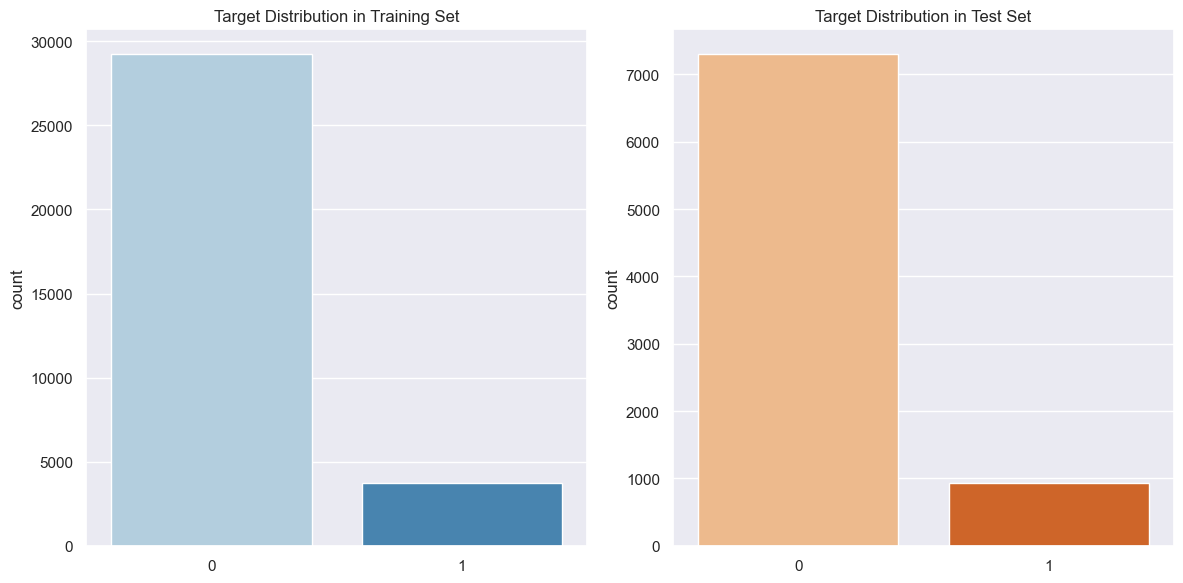

In [454]:
# Plotting the distribution of the target variable in both training and testing sets
plt.figure(figsize=(12, 6))

# Plot for the training set with a specific color palette
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, hue=y_train, palette='Blues', legend=False)
plt.title("Target Distribution in Training Set")

# Plot for the testing set with a different color palette
plt.subplot(1, 2, 2)
sns.countplot(x=y_test, hue=y_test, palette='Oranges', legend=False)
plt.title("Target Distribution in Test Set")

# Display the plots
plt.tight_layout()
plt.show()

### Training Without Balanced Dataset

Epoch 1/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8889 - loss: 0.3240 - val_accuracy: 0.8940 - val_loss: 0.2876
Epoch 2/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9010 - loss: 0.2717 - val_accuracy: 0.8932 - val_loss: 0.2892
Epoch 3/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9026 - loss: 0.2656 - val_accuracy: 0.8923 - val_loss: 0.2884
Epoch 4/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9028 - loss: 0.2678 - val_accuracy: 0.8944 - val_loss: 0.2874
Epoch 5/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9045 - loss: 0.2653 - val_accuracy: 0.8946 - val_loss: 0.2876
Epoch 6/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9047 - loss: 0.2593 - val_accuracy: 0.8952 - val_loss: 0.2897
Epoch 7/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9066 - loss: 0.2585 - val_accuracy: 0.8949 - val_loss: 0.2878
Epoch 8/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9079 - loss: 0.2557 - 

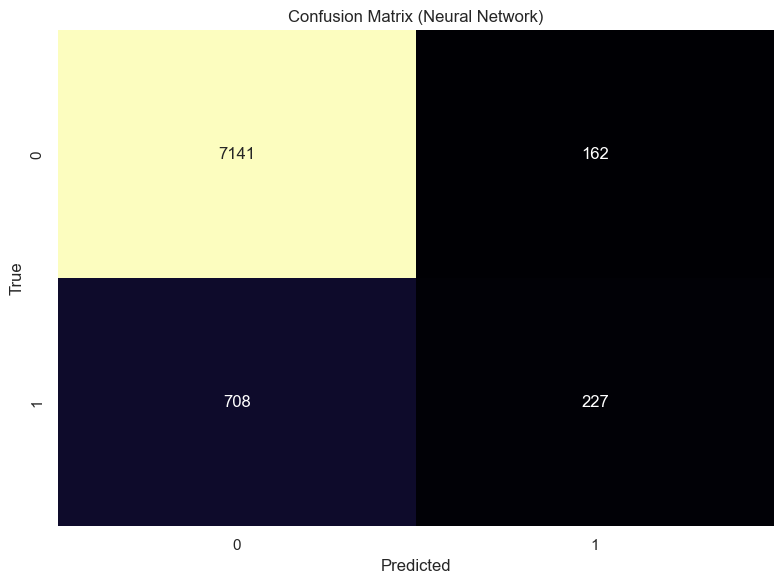

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.58      0.24      0.34       935

    accuracy                           0.89      8238
   macro avg       0.75      0.61      0.64      8238
weighted avg       0.87      0.89      0.87      8238


Confusion Matrix (Neural Network):
[[7141  162]
 [ 708  227]]


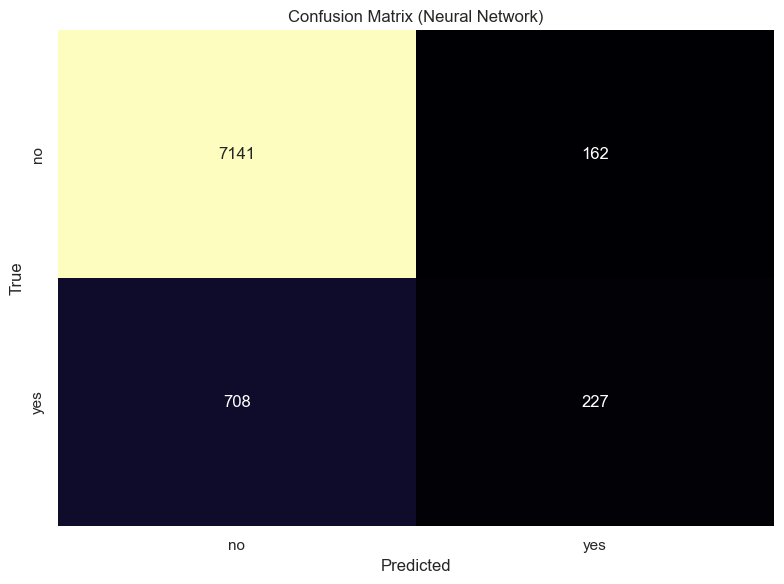

In [455]:

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)  # Fit and transform on training data
X_test = scaler.transform(X_test_df)        # Transform on test data


# Define the model
model_no_bal = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape explicitly
    Dense(64, activation='relu'),             # Hidden layer 1
    Dense(32, activation='relu'),             # Hidden layer 2
    Dense(1, activation='sigmoid')            # Output layer for binary classification
])

# Compile the model
model_no_bal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_no_bal.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)

# Evaluate the Neural Network model
results_nn = model_no_bal.evaluate(X_test, y_test)
print("\nNeural Network Test Loss:", results_nn[0])
print("Neural Network Test Accuracy:", results_nn[1])

# Make predictions using the Neural Network model
y_pred_nn = (model_no_bal.predict(X_test) > 0.5).astype("int32")

# Evaluate the Neural Network model using metrics
print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn))

print("\nConfusion Matrix (Neural Network):")
print(confusion_matrix(y_test, y_pred_nn))

# Confusion matrix for Neural Network predictions
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot the confusion matrix with a different color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Make predictions using the Neural Network model
y_pred_nn = (model_no_bal.predict(X_test) > 0.5).astype("int32")

# Evaluate the Neural Network model using metrics
print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn))

print("\nConfusion Matrix (Neural Network):")
print(confusion_matrix(y_test, y_pred_nn))

# Confusion matrix for Neural Network predictions
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot the confusion matrix with a different color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=df["y"].unique(), yticklabels=df["y"].unique())

plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


Accuracy: 0.8892935178441369

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.52      0.29      0.38       935

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238


Confusion Matrix:
[[7052  251]
 [ 661  274]]


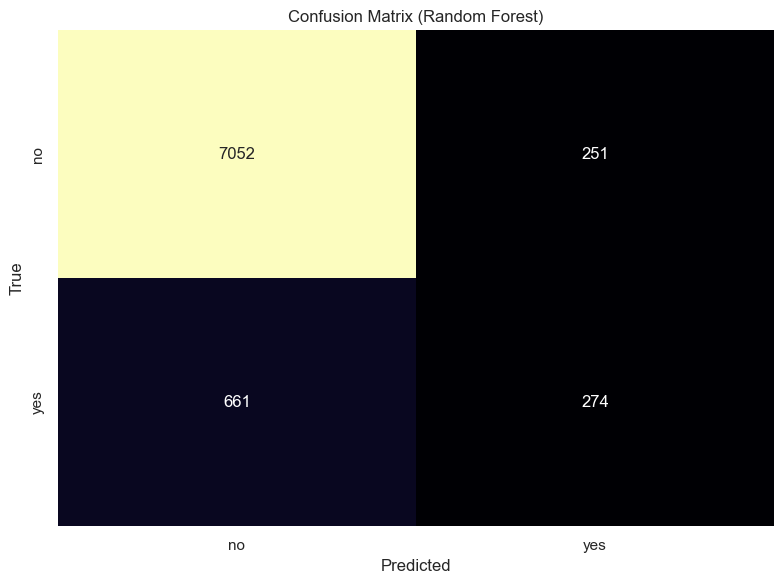

In [456]:
from sklearn.ensemble import RandomForestClassifier


rf_model_no_bal = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Maximum depth of trees, None means no limit
    random_state=42,        # Random seed for reproducibility
    class_weight='balanced' # Handle class imbalance
)

# Train the model
rf_model_no_bal.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model_no_bal.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Plot the confusion matrix with a color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=df["y"].unique(), yticklabels=df["y"].unique())

plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()




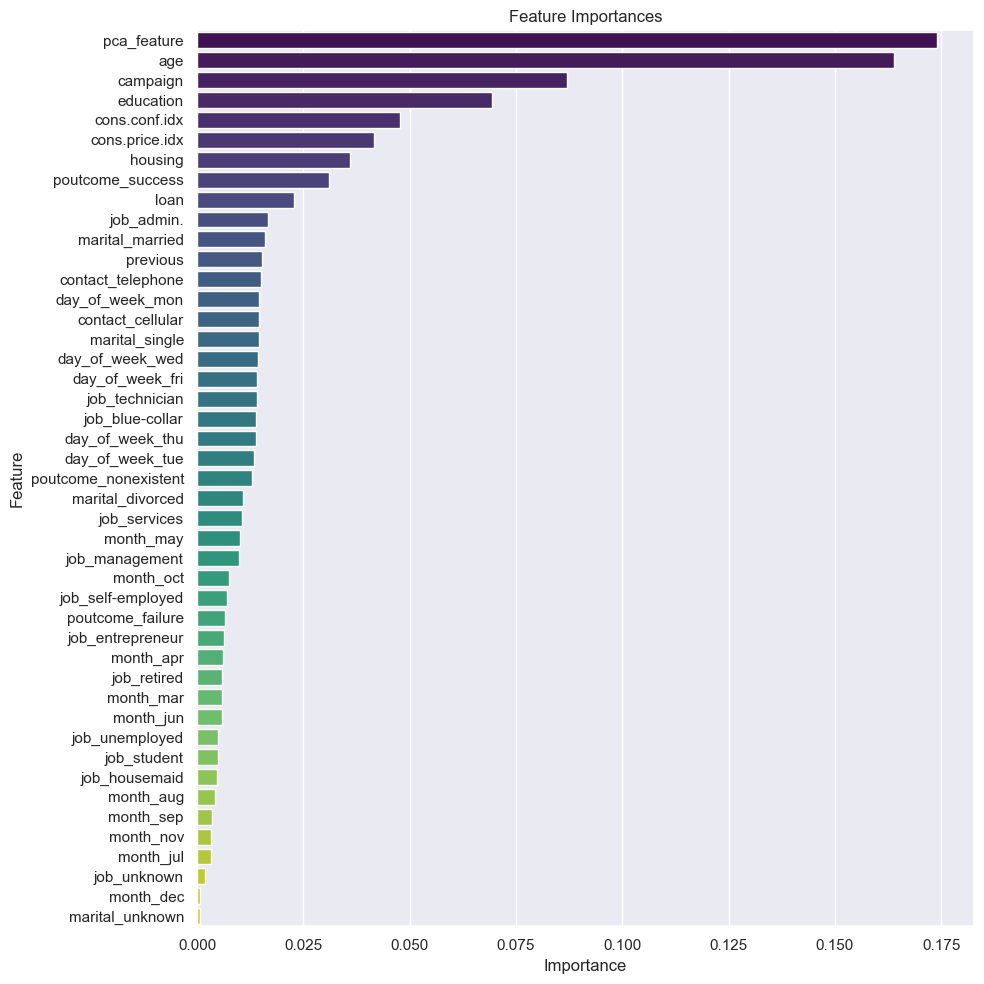

In [457]:
feature_importances = pd.DataFrame({
    'Feature': df_encoded.drop(columns=["y"]).columns,  # Replace 'y' with your target column name
    'Importance': rf_model_no_bal.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot the feature importances with a different color palette
plt.figure(figsize=(10, 10))

# Adding 'hue' to resolve the deprecation warning and control colors
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', hue='Feature', legend=False)

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


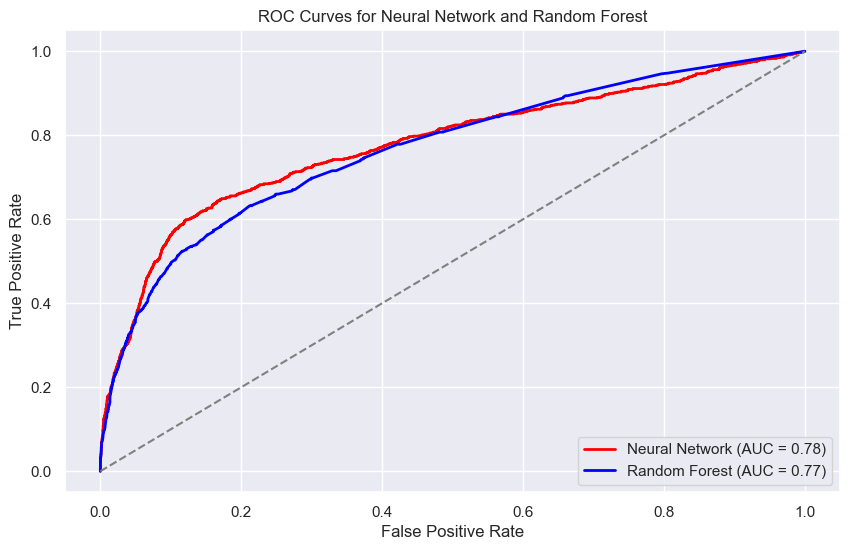

In [459]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for Random Forest (output class probabilities)
y_pred_prob_rf = rf_model_no_bal.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Get predicted probabilities for Neural Network (output class probabilities)
y_pred_prob_nn = model_no_bal.predict(X_test)[:, 0]  # Probabilities for class 1

# Compute ROC curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curves for both models
plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Neural Network and Random Forest')
plt.legend(loc="lower right")
plt.show()




### Training using ballanced dataset (SMOT)

In [465]:
from imblearn.over_sampling import SMOTE
X = df_encoded.drop(columns=["y"])  # Replace "target" with your actual target column name
y = df_encoded["y"]
le = LabelEncoder()
y = le.fit_transform(y)

# Step 1: Apply SMOTE (over-sampling)



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Class distribution after SMOTE over-sampling: Counter({0: 29245, 1: 29245})


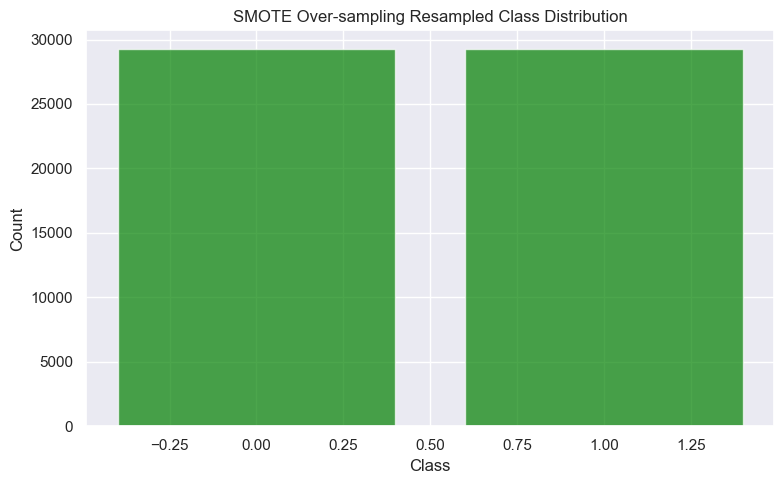

In [466]:
from collections import Counter

# Resampled class distribution
resampled_distribution = Counter(y_resampled)
print(f"Class distribution after SMOTE over-sampling: {resampled_distribution}")

# Step 2: Plot the resampled class distribution
fig, ax = plt.subplots(figsize=(8, 5))

# Resampled distribution bar chart (after SMOTE over-sampling)
ax.bar(resampled_distribution.keys(), resampled_distribution.values(), color='green', alpha=0.7)
ax.set_title("SMOTE Over-sampling Resampled Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

# Show the plot
plt.tight_layout()
plt.show()


Epoch 1/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8642 - loss: 0.3221 - val_accuracy: 0.8861 - val_loss: 0.3075
Epoch 2/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9258 - loss: 0.1978 - val_accuracy: 0.8889 - val_loss: 0.3091
Epoch 3/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9302 - loss: 0.1879 - val_accuracy: 0.8905 - val_loss: 0.3114
Epoch 4/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9298 - loss: 0.1845 - val_accuracy: 0.8736 - val_loss: 0.3402
Epoch 5/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9281 - loss: 0.1856 - val_accuracy: 0.8832 - val_loss: 0.3182
Epoch 6/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9309 - loss: 0.1813 - val_accuracy: 0.8903 - val_loss: 0.3067
Epoch 7/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9316 - loss: 0.1796 - val_accuracy: 0.8838 - val_loss: 0.3156
Epoch 8/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9330 - loss: 0.1742 - 

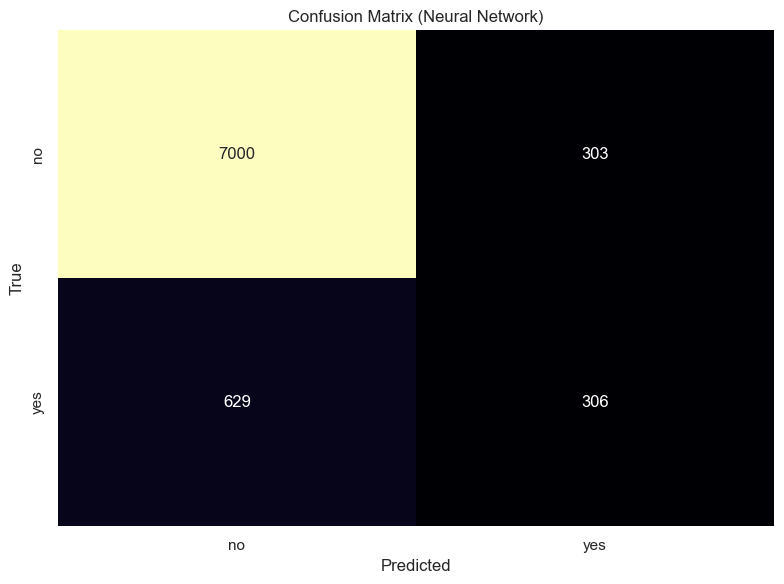

In [472]:

from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

if isinstance(X_resampled, pd.DataFrame):
    X_resampled = X_resampled.values  # Convert to NumPy array if X_resampled is a DataFrame
if isinstance(X_test_df, pd.DataFrame):
    X_test_df = X_test_df.values  # Convert to NumPy array if X_test_df is a DataFrame


# Standardize the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)  # Fit and transform on training data
X_test = scaler.transform(X_test_df)        # Transform on test data

class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_resampled), 
    y=y_resampled
)
class_weights_dict = dict(zip(np.unique(y_resampled), class_weights))

# Define the model
nn_model_bal = Sequential([
    Input(shape=(X_resampled.shape[1],)),  # Define input shape explicitly
    Dense(64, activation='relu'),     # Hidden layer 1
    Dense(32, activation='relu'),     # Hidden layer 2
    Dense(1, activation='sigmoid')    # Output layer for binary classification
])

# Compile the model
nn_model_bal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

nn_model_bal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = nn_model_bal.fit(
    X_resampled, y_resampled,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    class_weight=class_weights_dict 
)

# Evaluate the Neural Network model
results_nn = nn_model_bal.evaluate(X_test, y_test)
print("\nNeural Network Test Loss:", results_nn[0])
print("Neural Network Test Accuracy:", results_nn[1])

# Make predictions using the Neural Network model
y_pred_nn = (nn_model_bal.predict(X_test) > 0.5).astype("int32")

# Evaluate the Neural Network model using metrics
print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn))

print("\nConfusion Matrix (Neural Network):")
print(confusion_matrix(y_test, y_pred_nn))

# Confusion matrix for Neural Network predictions
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot the confusion matrix with a different color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=df["y"].unique(), yticklabels=df["y"].unique())

plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7303
           1       0.48      0.36      0.41       935

    accuracy                           0.88      8238
   macro avg       0.70      0.66      0.67      8238
weighted avg       0.87      0.88      0.88      8238


Confusion Matrix:
[[6937  366]
 [ 596  339]]


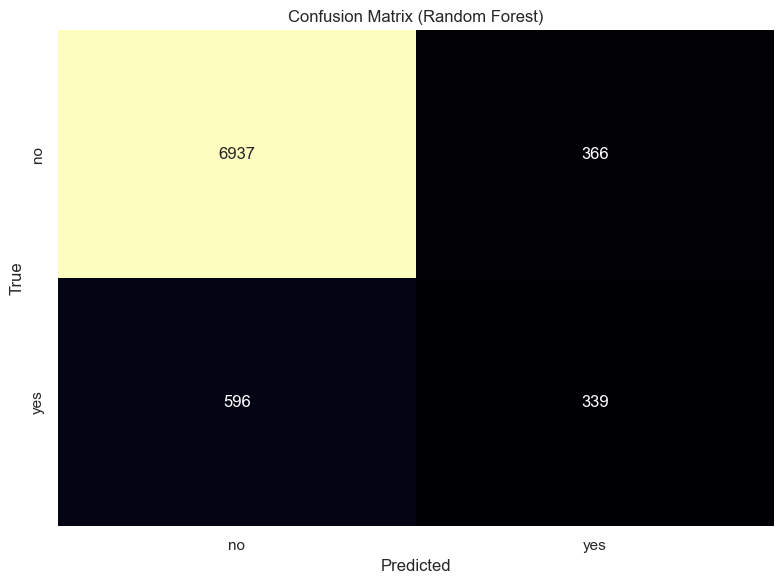

In [474]:
from sklearn.ensemble import RandomForestClassifier


rf_model_bal = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Maximum depth of trees, None means no limit
    random_state=42,        # Random seed for reproducibility
    class_weight='balanced' # Handle class imbalance
)

# Train the model
rf_model_bal.fit(X_resampled, y_resampled)
# Make predictions
y_pred_rf = rf_model_bal.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Plot the confusion matrix with a color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=df["y"].unique(), yticklabels=df["y"].unique())

plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

**Explanation**
- In the NN and RF calss(0) f1 score is much higer then Class(1) it wil possibly happens beacuse of the imbalanced dataset
- To reduce this we an use SWOT balance 

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step


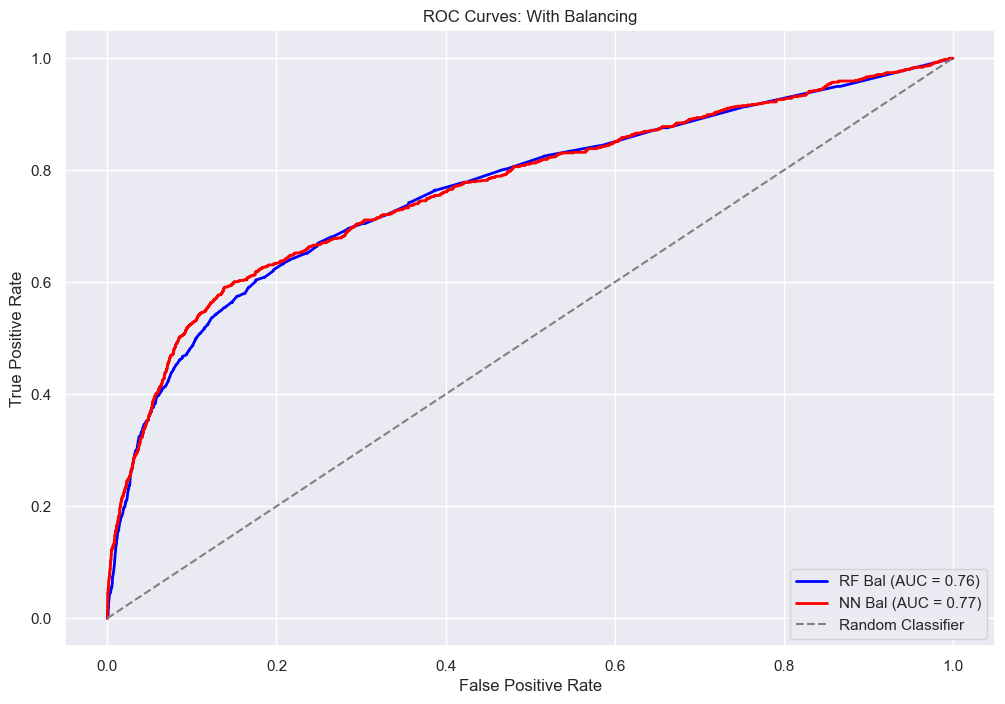

In [475]:
y_pred_prob_rf_bal = rf_model_bal.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve for Random Forest (with balancing)
fpr_rf_bal, tpr_rf_bal, thresholds_rf_bal = roc_curve(y_test, y_pred_prob_rf_bal)
roc_auc_rf_bal = auc(fpr_rf_bal, tpr_rf_bal)

# Predicted probabilities for Neural Network (with balancing)
y_pred_prob_nn_bal = nn_model_bal.predict(X_test)[:, 0]  # With balancing
fpr_nn_bal, tpr_nn_bal, thresholds_nn_bal = roc_curve(y_test, y_pred_prob_nn_bal)
roc_auc_nn_bal = auc(fpr_nn_bal, tpr_nn_bal)


plt.figure(figsize=(12, 8))

# With balancing
plt.plot(fpr_rf_bal, tpr_rf_bal, color='blue', linestyle='-', lw=2, label=f'RF Bal (AUC = {roc_auc_rf_bal:.2f})')
plt.plot(fpr_nn_bal, tpr_nn_bal, color='red', linestyle='-', lw=2, label=f'NN Bal (AUC = {roc_auc_nn_bal:.2f})')

# Reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: With Balancing')
plt.legend(loc="lower right")
plt.show()


